# Computational and Artifical Intelligenge Assignment 1

Problem Solving by Searching using IDA* and Best First Search

Weightage: 10%

Date of Posting - 04/July/2019

Deadline - 19/July/2019

Please enter group and individual information here

Group ID/Number: BAI7 

Group Members BITS ID: 2018AB04056,2018AB04051,2018AB04062, 

Things to follow

1. Use appropriate data structures for the fringes and explain the reasoning behind the usage. You need not create data structures, instead use available libraries directly.

2. Avoid any hard-coding unless absolutely necessary.

3. Provide proper documentation

Coding begins now!!!

Define the environment representation in the following code block

In [1]:
#Environment representation goes here
# declared the initial matix as all zeros
from queue import Queue
import numpy as np 
import pandas as pd
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
initial_matrix = np.zeros((8, 11))

In [2]:
#initializing the intial matrix with the paths as 1 which denotes that it is blocked 
initial_matrix[2][2]=1
initial_matrix[2][3]=1
initial_matrix[3][2]=1
initial_matrix[3][3]=1
initial_matrix[1][6]=1
initial_matrix[1][7]=1
initial_matrix[1][8]=1
initial_matrix[2][8]=1
initial_matrix[3][8]=1
initial_matrix[6][2]=1
initial_matrix[6][3]=1
initial_matrix[6][4]=1
initial_matrix[6][5]=1
initial_matrix[6][6]=1
initial_matrix[6][7]=1
initial_matrix[6][8]=1

#printing the initial matrix to see the data 
print("The complete matrix with the blocked path")
initial_matrix=initial_matrix.astype(int)
initial_matrix

The complete matrix with the blocked path


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
# another way to visualise the matrix without nd-array
def print_matrix(matrix):
    for line in matrix:
        print(*line)
    print()

initial_matrix_str =initial_matrix.astype(str)
print_matrix(initial_matrix_str)

0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0
0 0 1 1 0 0 0 0 1 0 0
0 0 1 1 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0
0 0 1 1 1 1 1 1 1 0 0
0 0 0 0 0 0 0 0 0 0 0



2 5


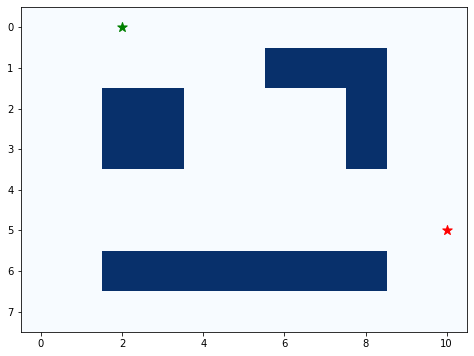

In [5]:
# start point and goal
start = (0,2)
goal = (5,10)
print(start[1],goal[0])
 

# plot map and path
fig, ax = plt.subplots(figsize=(8,10))

ax.imshow(initial_matrix, cmap=plt.cm.Blues)
ax.scatter(start[1],start[0], marker = "*", color = "green", s = 100)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 100)
plt.show()

Define the fringe (data structure) and its supported methods in the following code block

In [6]:
# defining the heuristic function
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

Define your IDA* in the following code block

In [7]:
#Algorithm IDA*
def astar(array, start, goal):

    neighbors = [(-1, 0),(1, 0),(0, 1),(0, -1)]

    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j    
            tentative_g_score = gscore[current] + heuristic(current, neighbor)           
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor)) 

In [12]:
# matrix representation for best first search
# converted 
matrix=initial_matrix_str

In [15]:
num_rows = len(matrix)
num_cols = len(matrix[0])

print(num_rows,num_cols)
# defining the goal state
goal_state = (5, 10)

8 11


Define your Greedy Best First Search algorithm in the following code block

In [20]:
#Algorithm Best First Search
def greedy_best_first(current_path):
    # anchor
    row, col = current_path[-1]
    if (row, col) == goal_state:
        return True

    # try all directions one after the other
    for direction in [(row, col + 1), (row, col - 1), (row + 1, col), (row - 1, col)]:
        new_row, new_col = direction
        if (0 <= new_row < num_rows and 0 <= new_col < num_cols and  # stay in matrix borders
                matrix[new_row][new_col] == "0" and                  # don't run in walls
                (new_row, new_col) not in current_path):             # don't run in circles
            # try new direction
            current_path.append((new_row, new_col))
            if greedy_best_first(current_path):  # recursive call
                return True
            else:
                current_path.pop()  # backtrack

Feel free to add code blocks for any other methods needed starting here.

In [25]:
# Code Block 1
# Specifying the start node and result will hold the path from the start node 
result = [(0, 2)]

Call your main function/algorithm for IDA* in the next code block with appropriate input representation

In [8]:
#Computation call for IDA*
route = astar(initial_matrix, start, goal)

Call your main function/algorithm for Best First Search in the next code block with appropriate input representation

In [27]:
#Computation call for Best First Search
# result a list of coordinates which should be taken in order to reach the goal

greedy_best_first(result)

True

The agent should provide expected output for questions mentioned below in the subsequent blocks

(1) Path taken to reach destination from source for IDA*

In [9]:
# Execute statement to retrieve the path taken here using IDA*
route = route + [start]
route = route[::-1]
print(route)

[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (4, 10), (5, 10)]


(1) Path taken to reach destination from source for Best First Search

In [31]:
# Execute statement to retrieve the path taken here using Best First Search
print("The path taken is",result)

The path taken is [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 10), (1, 9), (2, 9), (2, 10), (3, 10), (3, 9), (4, 9), (4, 10), (5, 10)]


(2) Cost of the path for IDA* here

In [35]:
# Execute statement to retrieve the cost of the path here using IDA*
print("The cost of the path here using IDA* is ",len(route) )

The cost of the path here using IDA* is  14


(2) Cost of the path for Best First Search here

In [36]:
# Execute statement to retrieve the cost of the path here using Best First Search
print("The cost of the path here using Best First Search is ",len(result) )

The cost of the path here using Best First Search is  18


(3) Total Number of nodes expanded to get this state using IDA*

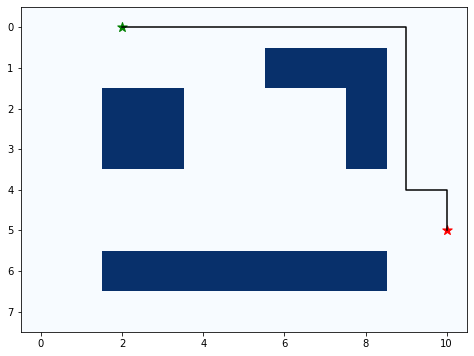

In [11]:
# Execute statement to retrieve the total number of nodes expanded to get this state using IDA* here
#extract x and y coordinates from route list
x_coords = []
y_coords = []

for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path
fig, ax = plt.subplots(figsize=(8,10))
ax.imshow(initial_matrix, cmap=plt.cm.Blues)
ax.scatter(start[1],start[0], marker = "*", color = "green", s = 100)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 100)
ax.plot(y_coords,x_coords, color = "black")
plt.show()

(3) Total Number of nodes expanded to get this state using Best First Search

In [37]:
# Execute statement to retrieve the total number of nodes expanded to get this state using Best First Search here
print("Total number of nodes expanded to get this state using Best First Search",len(result) )

Total number of nodes expanded to get this state using Best First Search 18


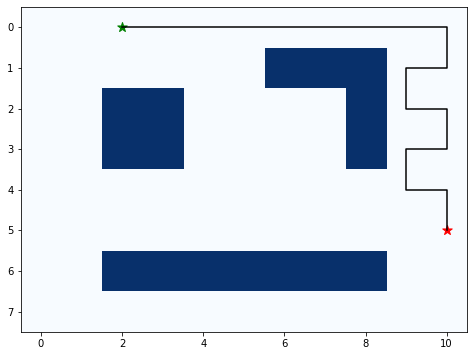

In [33]:
x_coords = []
y_coords = []

for i in (range(0,len(result))):
    x = result[i][0]
    y = result[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path
fig, ax = plt.subplots(figsize=(8,10))
ax.imshow(initial_matrix, cmap=plt.cm.Blues)
ax.scatter(start[1],start[0], marker = "*", color = "green", s = 100)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 100)
ax.plot(y_coords,x_coords, color = "black")
plt.show()

(4) Maximum number of nodes kept at the memory at any point in time using IDA*

In [1]:
# Execute Output for the maximum number of nodes kept at the memory at any point in time using IDA* here
# while executing IDA* it explores its neighbors and calculates its euclidean distance  .
# for i, j in neighbors -> this part of the code does it 
print("The maximum number of nodes kept at the memory at any point in time using IDA* here",2 )

The maximum number of nodes kept at the memory at any point in time using IDA* here 2


(4) Maximum number of nodes kept at the memory at any point in time using Best First Search

In [2]:
# Execute Output for the maximum number of nodes kept at the memory at any point in time using Best First Search here
# while executing BFS it explores its neighbors which are 4 directions of node .
# for direction in [(row, col + 1), (row, col - 1), (row + 1, col), (row - 1, col)] -> we keep this in memory 
print("The maximum number of nodes kept at the memory at any point in time using Best First Search  ",4 )

The maximum number of nodes kept at the memory at any point in time using Best First Search   4


All the best!! Happy Coding!!
Let human intelligence prevail